**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

**Pakages**

In [2]:
import numpy as np
import sympy as sm
import random
from scipy.optimize import minimize,root

import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits import mplot3d
plt.style.use('ggplot') # for nice plots
from scipy.optimize import minimize
from types import SimpleNamespace
import time
from scipy import optimize

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules 
import questionone
from questionone import *
import questiontwo
from questiontwo import *
import questionthree 
from questionthree import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [3]:
# In your notebook:
optimal_labor_eq = questionone.calculate_optimal_labor_supply()
print(f'This gives an optimal labor supply choice which is equivalent to what was given in the question:')
optimal_labor_eq

This gives an optimal labor supply choice which is equivalent to what was given in the question:


Eq(L^*, (-kappa*nu + sqrt(nu*(4*alpha*conjugate(w)**2 + kappa**2*nu)))/(2*nu*conjugate(w)))

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

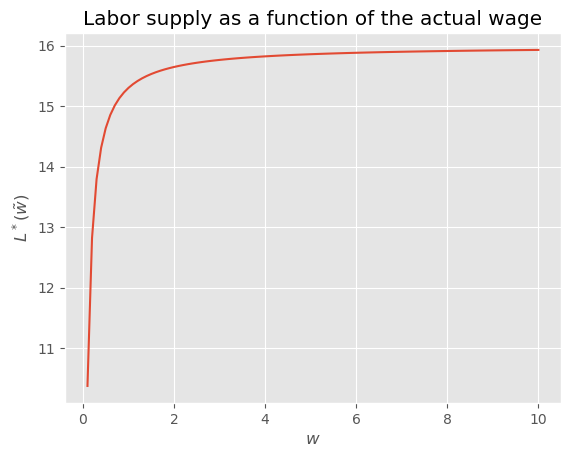

In [4]:
# 1. turning into a python function
L_star_func = calculate_optimal_labor_supply_func_2(optimal_labor_eq)

# 2. unpacking parameters
par = questionone.par

# plotting
questionone.plot_labor_supply(L_star_func, par)


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


*We understood to plot each of the variables against a grid of $\tau$-values, individually.*

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (1/2)*(-kappa*nu + sqrt(nu*(4*_Dummy_31**2*alpha + kappa**2*nu)))/(_Dummy_31*nu)
C:\Users\mathi\AppData\Local\Temp\ipykernel_23188\831228617.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2


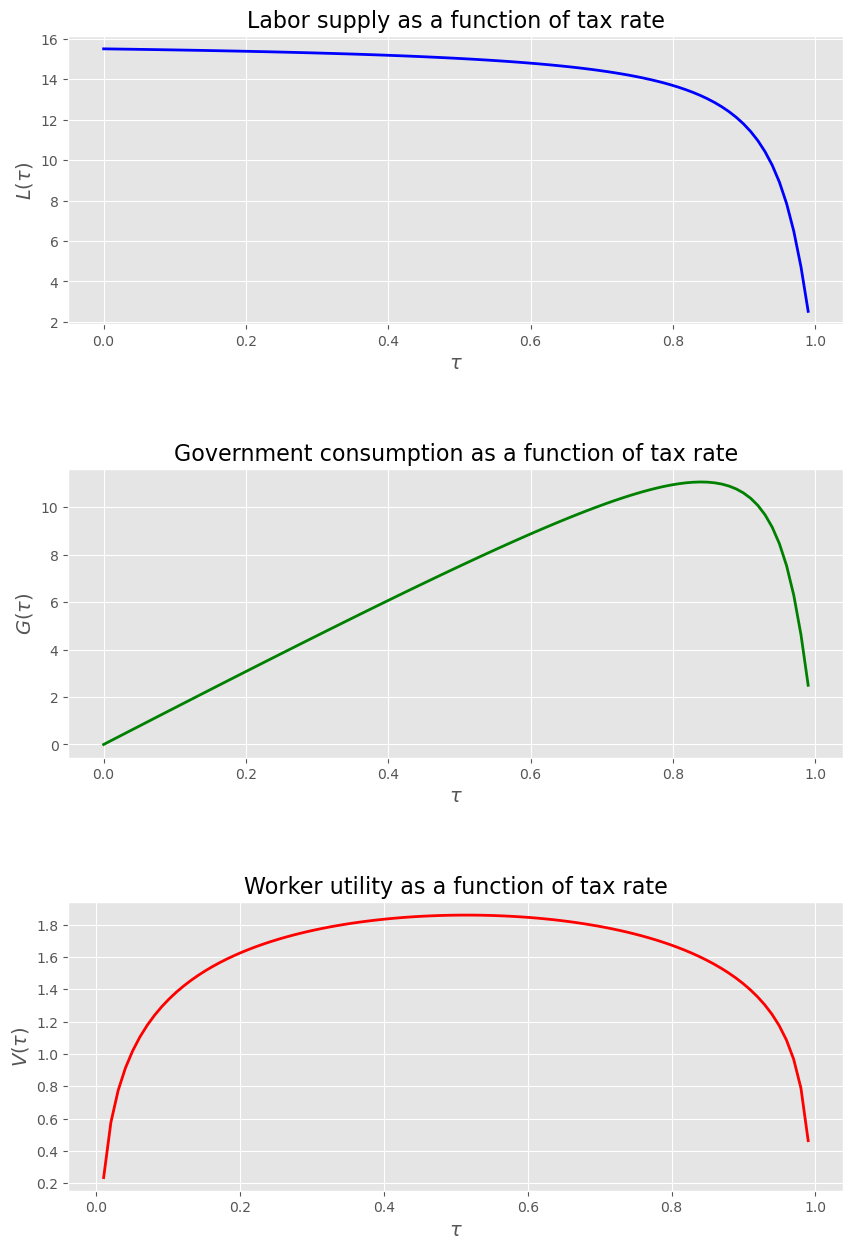

In [5]:
# Define function for labor supply and government consumption
def L_star(tau, w=par.w_val, kappa=par.kappa_val, alpha=par.alpha_val, G=par.G_val, nu=par.nu_val):
    tilde_w = (1 - tau) * w
    return L_star_func(kappa, alpha, G, nu, tilde_w)

def G_func(tau, w=par.w_val, L_func=L_star):
    return tau * w * L_func(tau)

# Define function for worker utility
def V(tau, w=par.w_val, kappa=par.kappa_val, alpha=par.alpha_val, G_func=G_func, L_func=L_star, nu=par.nu_val):
    tilde_w = (1 - tau) * w
    L = L_func(tau)
    C = kappa + tilde_w * L
    G = G_func(tau)
    return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2

# Grid of tau values
tau_values = np.linspace(0, 1, 100)

# Calculate labor supply, government consumption and worker utility for each tau
L_values = [L_star(tau) for tau in tau_values]
G_values = [G_func(tau) for tau in tau_values]
V_values = [V(tau) for tau in tau_values]

# Plot labor supply, government consumption and worker utility
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Adjust the vertical spacing between plots
fig.subplots_adjust(hspace=0.5)

ax[0].plot(tau_values, L_values, color='blue', linewidth=2)
ax[0].set_xlabel(r'$\tau$', fontsize=14)
ax[0].set_ylabel(r'$L(\tau)$', fontsize=14)
ax[0].set_title('Labor supply as a function of tax rate', fontsize=16)
ax[0].grid(True)

ax[1].plot(tau_values, G_values, color='green', linewidth=2)
ax[1].set_xlabel(r'$\tau$', fontsize=14)
ax[1].set_ylabel(r'$G(\tau)$', fontsize=14)
ax[1].set_title('Government consumption as a function of tax rate', fontsize=16)
ax[1].grid(True)

ax[2].plot(tau_values, V_values, color='red', linewidth=2)
ax[2].set_xlabel(r'$\tau$', fontsize=14)
ax[2].set_ylabel(r'$V(\tau)$', fontsize=14)
ax[2].set_title('Worker utility as a function of tax rate', fontsize=16)
ax[2].grid(True)

# Display the plot
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The optimal tax rate is: 0.51


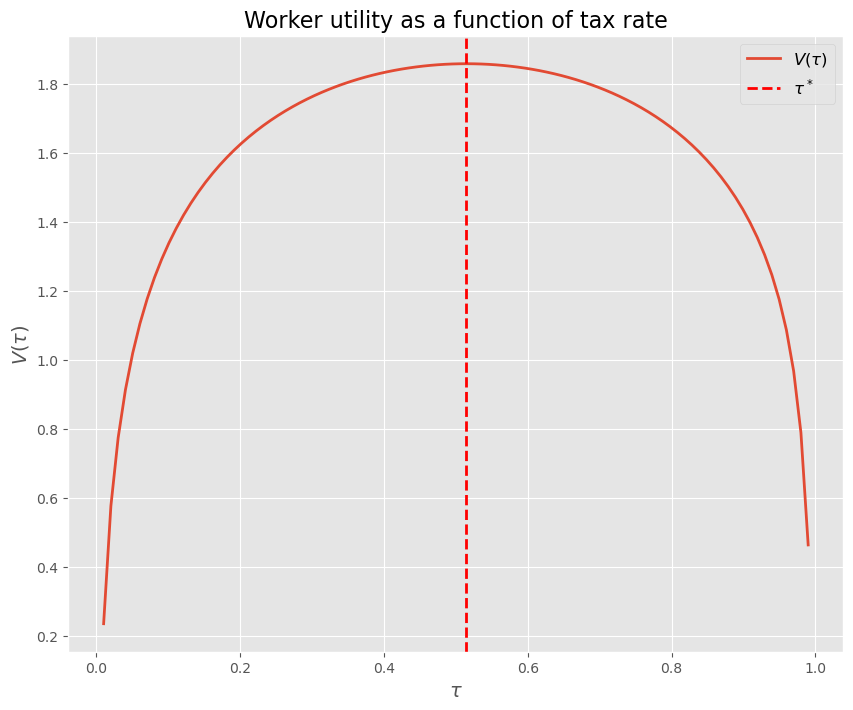

In [6]:
# Define the objective function as the negative of the worker utility function
objective_func = lambda tau: -V(tau)

# Initial guess for tau
tau_initial_guess = 0.5

# Optimize
result = minimize(objective_func, tau_initial_guess, bounds=[(0, 1)])

# Retrieve the optimal tax rate
tau_star = result.x[0]

# Print the optimal tax rate
print(f"The optimal tax rate is: {tau_star:.2f}")

# Plot worker utility as a function of tax rate with the optimal tax rate
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(tau_values, V_values, linewidth=2)
ax.axvline(x=tau_star, color='r', linestyle='--', linewidth=2)
ax.set_xlabel(r'$\tau$', fontsize=14)
ax.set_ylabel(r'$V(\tau)$', fontsize=14)
ax.set_title('Worker utility as a function of tax rate', fontsize=16)
ax.grid(True)
ax.legend([r'$V(\tau)$', r'$\tau^*$'], fontsize=12)

# Display the plot
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
# Find the equilibrium level of G for each parameter set
for i in range(2):
    sigma = par.sigma_values[i]
    rho = par.rho_values[i]
    epsilon = par.epsilon_values[i]
    G_star = G_func_v2(par.tau, rho=rho, sigma=sigma, epsilon=epsilon)
    print(f"For parameter set {i+1} (sigma = {sigma}, rho = {rho}, epsilon = {epsilon}):")
    print(f"The equilibrium level of G is: {G_star:.2f}")

For parameter set 1 (sigma = 1.001, rho = 1.001, epsilon = 1.0):
The equilibrium level of G is: 1.00
For parameter set 2 (sigma = 1.5, rho = 1.5, epsilon = 1.0):
The equilibrium level of G is: 4.86


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [8]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

*To numercially varify the level of labour that maximizes profits, we run a simulation for each kappa. We check the optimal level of labour following the suggested policy and the profit at this level of labor. Lastly, we compare this with this profit with profits stemming from 100 different levels of labour around the level found by the policy.*

*As expected, we find that the policy maximizes profits in both cases.*

In [9]:
# 1. setting up parameters
par = questiontwo.par
kappa_discrete = [1.0, 2.0]

# 2. running simulation with discrete kappa
for kappa in kappa_discrete:
    l_optimal = optimal_l(par, kappa)
    profit_optimal = profit(par, kappa, l_optimal)

    l_values = np.linspace(0.5 * l_optimal, 2 * l_optimal, 100)
    profits = [profit(par, kappa, l) for l in l_values]

    print(f"For kappa = {kappa}:")
    print(f"Optimal l: {l_optimal}")
    print(f"Profit at optimal l: {profit_optimal}")
    print(f"Max profit computed: {max(profits)}")
    print()

For kappa = 1.0:
Optimal l: 0.25
Profit at optimal l: 0.25
Max profit computed: 0.25

For kappa = 2.0:
Optimal l: 1.0
Profit at optimal l: 1.0
Max profit computed: 1.0



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

*We calculate H when the labour policy is followed by starting with $K=35$ simulations and increasing K until the relative size of the confidence interval is small enough (5 pct. is chosen as threshold).*

*On average after 10 runs, we find this to be true after $K=49$ simulations, which yields an (ex ante) expected value of the hair salon over 10 years to be $H=27.31$.*

In [10]:
# 1. Setting up empty lists for storing values of K and H
K_values = []
H_values = []

# 2. choosing a required precision level
epsilon = 0.05

# 3. Run simulation 10 times
for i in range(10):
    # 3.1 Start with a small K
    K = 35
    # 3.2 Setting up an empty list for storing the local value of H
    H_value = []
    while True:
        for k in range(K):
            # Change the seed for each simulation
            seed = (i + 1) * (k + 1)
            # Generate h for each run
            H_value.append(function_call(par, seed))
        
        # 3.3 Calculate mean and standard deviation
        mean_H = np.mean(H_value)
        std_H = np.std(H_value)
        conf_interval = 1.96 * std_H / np.sqrt(K)  # 95% confidence interval
        
        # 3.4 Break the loop if the relative size of the confidence interval is small enough
        if conf_interval / np.abs(mean_H) < epsilon:  # with 5 pct. precision
            break
        
        # 3.5 Increase K for the next iteration
        K += 1
    # 3.6 append the values of K and H to the lists  
    K_values.append(K)
    H_values.append(mean_H)

# 4. Print the mean result of K after 10 simulations
print(f"To find the average expected value of the salon of H = {np.mean(H_values):.2f} on")
print(f"average K={np.mean(K_values):.0f} simulations were needed to not change H significantly.")

To find the average expected value of the salon of H = 27.31 on
average K=49 simulations were needed to not change H significantly.


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

*We introduce the new policy and compare the mean profitability (over $K=49$, as found before) of each policy {old,new} over 10 simulations.* 

*We find that the new policy helps mitigating the problem with adjustment costs and thereby improves profitability with about 2.5 pct.*

In [11]:
# 1. introducing new parameter Delta
#par.Delta = 0.05

# 2. setting up an empty list for storing the improvement in H for the new policy
H_Delta = [] 
improvement = []

# 3. runing the simulation 10 times
for i in range(10):
    # 3.1 run simulations for new policy
    # setting up an empty list for storing the values of H for the new policy
    H_values_new = []
    for k in range(par.K):
        # setting new seed for each run and changing Delta
        seed = (i + 1) * (k + 1)
        par.Delta = 0.05
        # Generate h for each run
        H_values_new.append(function_call(par, seed))

    # calculate mean H for new policy
    H_new = np.mean(H_values_new)

    # saving the value of H for the new policy
    H_Delta.append(H_new)

    # 3.3 calculate the improvement
    improvement.append(H_new - np.mean(H_values))

# Print results
print(f'On average, the new policy improves profitability with {np.mean(improvement):.2f}.')


On average, the new policy improves profitability with 0.61.


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

*In order to find the optimal level of $\Delta$ maximizing $H$ we loop over 100 different levels of $\Delta$ from $[0,0.2]$ simulating $H$ each time.*

*We find that $\Delta=0.07$ on average maximizes profits.*

The mean best Delta value over 10 runs is 0.07.


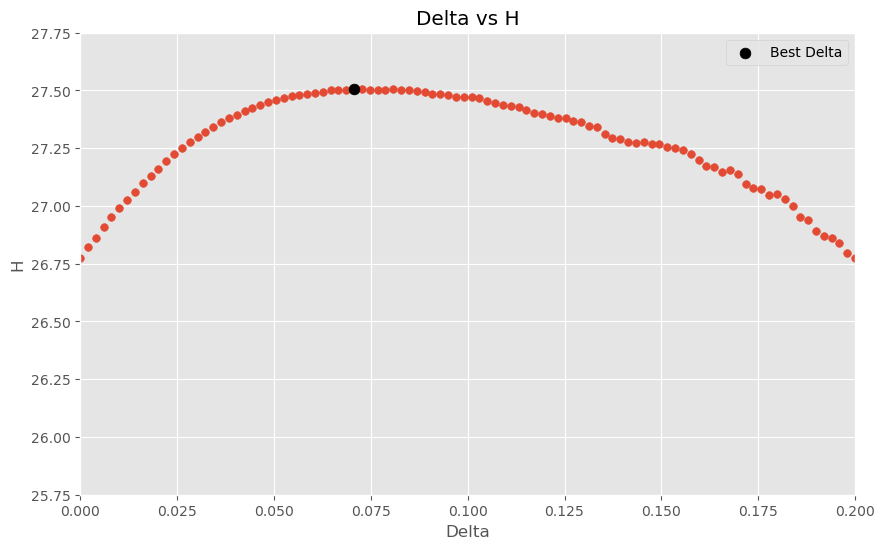

In [12]:
# 1. setting up an empty list for storing the values of Delta and H
Deltas = []
H_values_deltas = []
max_H_new = float('-inf')

# 2. simulating over a range of 500 Deltas between 0.0 and 0.4
for Delta in np.linspace(0, 0.20, 100):

    # Setting up an empty list for storing the values of H
    H_values_new = []
    for k in range(par.K):
        # Set new seed for each run and change Delta
        seed = (i + 1) * (k + 1)
        par.Delta = Delta
        # Generate h for each run
        H_values_new.append(function_call(par, seed))

    # Calculate H for new policy
    H_new = np.mean(H_values_new)
    
    # Append the values of Delta and H to the lists
    Deltas.append(Delta)
    H_values_deltas.append(H_new)
    
    # update the best Delta if the new H is higher than the previous best
    if H_new > max_H_new:
        max_H_new = H_new
        best_Delta = Delta
            
# 3. print results    
print(f"The mean best Delta value over 10 runs is {best_Delta:.2f}.")

# 4. Plot Delta vs H
plt.figure(figsize=(10, 6))
plt.scatter(Deltas, H_values_deltas, s=30)  # Reduce the size of dots with s parameter
plt.xlabel("Delta")
plt.ylabel("H")
plt.title("Delta vs H")
plt.xlim(0, 0.2)  # Set the x-axis limits
plt.ylim(25.75, 27.75)  # Set the y-axis limits
plt.grid(True)

# 5. mark the best Delta with a red dot
best_index = H_values_deltas.index(max_H_new)
plt.scatter(Deltas[best_index], H_values_deltas[best_index], c='black', label='Best Delta',s=60)
plt.legend()

plt.show()



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



*We suggest and implement a policy of having part time employees as buffers, such that these employees could be adjusted in working hours dynamically after shocks are realized. For instance, think about a situation where in a period with a moderate negative shock it would be optimal to fire 0.6 employees. Normally, that would entail firing costs of $\iota$. By instead lowering the hours of the employee, we don't need to fire the person. In our setup we accept that there would still be adjustment costs, ie. that could be compensation to the employee, but only of $0.6 \cdot \iota$.*

*Our extention improves profitability with 1.3 against the situation without any policy in place, equivalent to: 4.8 pct., and with 0.69 against the policy with an optimal $\Delta=0.07$, equivalent to: 2.5 pct.*

In [13]:
# 1. restoring Delta to 0
par.Delta=0

# 2. setting up an empty list for storing the values improvement in H for no policy or optimal Delta policy
improvement_no_policy = []
improvement_optimal_Delta = []

# 2. runing the simulation 50 times
for i in range(50):
    # Run simulations for the extention
    H_values_extention = []
    for k in range(par.K):
        seed = (i + 1) * (k + 1)
        H_values_extention.append(function_call(par, seed, extention=True))

    # Calculate H for the extention
    H_extention = np.mean(H_values_extention)

    #Improvement
    improvement_no_policy.append(H_extention - np.mean(H_values))
    improvement_optimal_Delta.append(H_extention - np.mean(H_Delta))

# Print results
print(f'On average, our new extention improves profitability with:')
print(f'   {np.mean(improvement_no_policy):.2f}, against the situation with no policy.')
print(f'   {np.mean(improvement_optimal_Delta):.2f}, against the situation with Delta=0.07.')

On average, our new extention improves profitability with:
   1.30, against the situation with no policy.
   0.69, against the situation with Delta=0.07.


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [14]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

**Illustration of the refined global optimizer with multi-start**

*We understand the **effective** inital guesses $\mathbf{x}^{k0}$ as the initial guesses described in part E of the algorithm. To illustrate, we plot the guesses for  $x_1$ and $x_2$ against the iteration counter $k$ including the warm up guesses.*

1. Defining the settings

In [15]:
# Settings
par_3 = SimpleNamespace()
par_3.bounds = np.array([[-600, 600], [-600, 600]])
par_3.tau = 1e-8
par_3.max_iters = 1000
par_3.seed_ = 200

2. Calling the refined global optimizer with multi-start described in the question with the settings defined above and 10 warm-up iterations. The optimizer can be seen in the py file questionthree.py.

Global optimum using 10 warmup iterations:
x1 = :-0.000, x2 = -0.000
Iteration:  279
After: 2.86 seconds



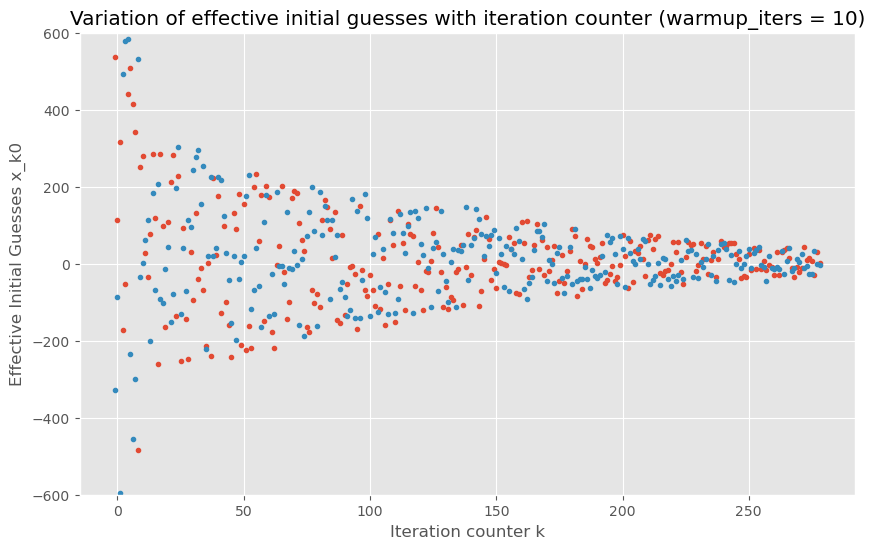

In [16]:
global_opt(par_3, 10, do_print=True, do_plot=True)

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

**Running the algorithm for a single seed**

*Initially, we run the optimizer for a single seed for 10 and 100 warm-up iterations, respectively. We find that the convergence is faster with K = 10 warm-up iterations, coming in at 0.45 seconds, as opposed to 0.49 seconds with 100 warm-up iterations. It also requires fewer iterations to converge with 10 warm-up iterations.*

In [17]:
global_opt(par_3, 10, do_print=True )
global_opt(par_3, 100, do_print=True)

Global optimum using 10 warmup iterations:
x1 = :-0.000, x2 = -0.000
Iteration:  279
After: 2.55 seconds

Global optimum using 100 warmup iterations:
x1 = :-0.000, x2 = -0.000
Iteration:  292
After: 2.76 seconds



*The effects of more warm-up iterations can be seen in the plot below, where we plot the guesses for  $x_1$ and $x_2$ agains the iteration counter $k$ for the case of 100 warm-up iterations. Here the first 100 iterations are randomly distributed.* 

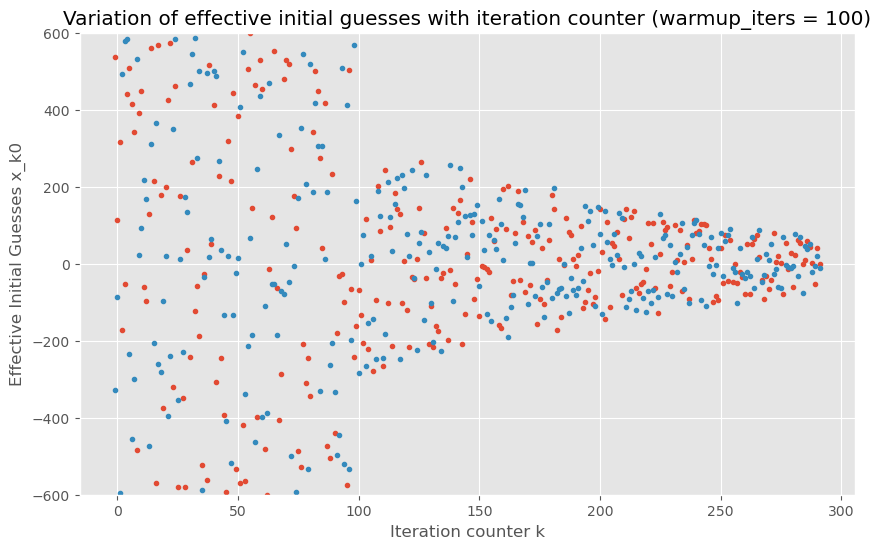

In [18]:
global_opt(par_3, 100, do_plot=True) 

**Running the algorithm for multiple seeds**

*We rerun the optimiser for multiple seeds to see if the results are consistent. And find that the algorithm with 100 warm-up itterasitons is consistently slower in speed and requires more itterations to converge. We therefore conclude that it is not a better idea to set $\underline{K} = 100$. The speed function timer can be seen in the py file questionthree.py*

In [19]:
#We choose to loop over the algorithm 50 times and plot the speed of the algorithm
num_loops = 40
speed_func(par_3, num_loops, plot = True)

**The effect of the first guess after the warm-up iterations**

The advantage of more warm-up guesses could be that we explore the function and find a better starting point. The graph below shows the distance the first guess after the warm-up iterations is from the global minimum and the total number of iterations before convergence for a number of simulations.

The figure shows that increasing the number of warm-up iterations does improve the first guess to which we apply the algorithm but not enough to improve the total number of iterations before convergence.

In [ ]:
speed_func(par_3, num_loops, plot_distans_to_xtrue=True)